# Importing dependencies

In [6]:
import pandas
import matplotlib.pyplot as plt

# Read the csv

In [7]:
reader = pandas.read_csv(r"grades.csv")
print(reader)

   Subject  Grade  Estimated_grade  Estimated_grade_by_bot  \
0     engl   13.0             18.0                   16.25   
1     engl   16.0             17.0                   15.75   
2       fr   18.0             18.0                   18.50   
3    maths   18.5             19.0                   18.50   
4    maths   19.5             19.0                   18.50   
5     phys   15.0             17.0                   16.00   
6     hist   14.0             11.0                   12.50   
7      NSI   20.0             17.0                   18.50   
8    maths   16.0             17.0                   17.50   
9    ESbio   14.0             16.0                   15.00   
10      fr   20.0             17.0                   18.00   
11     spa   17.0             13.0                   13.00   
12    engl    NaN             16.0                   15.25   
13    phys   19.0             18.0                   17.50   
14     spa    NaN             16.0                   16.50   
15    eu

# Plotting the perfect grade's completion

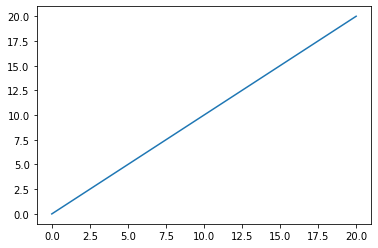

In [17]:
plt.plot([0, 20], [0, 20])